In [1]:
import pandas as pd
from scipy.stats import levene


pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

# Import Dataset

In [2]:
# Import df_CS.csv as df
df = pd.read_csv('df_CS.csv')

# Display the first few rows of the DataFrame
df.head()

,record_id,covid_group,interventiongroup,mmrc_score,pcfs_score,subject_dob,subject_gender,subject_ethnicity,health_smoking,health_history,health_medications,covid_onset,covid_infections,covid_vaccinations,covid_supplemento2,covid_hospitalization,covid_icu,covid_mechanicalvent,covid_intubation,covid_apnea,covid_apnea_ahi,covid_apnea_rdi,covid_apnea_cpap,covid_hallucinations,covid_taste,covid_smell,covid_hearing,covid_tinnitus,covid_vision,covid_throat,covid_choking,covid_sweating,covid_sneezing,covid_coughing,covid_voice,covid_fevers,covid_hair,covid_skin,covid_digestion,covid_chestpain,covid_palpitations,covid_restlessleg,covid_other,covid_primary,data_age,cpet_hr_restingsit,cpet_sbp_sitting,cpet_dbp_sitting,cpet_hr_restingstand,cpet_sbp_standing,cpet_dbp_standing,cpet_spo2_pre,data_kilograms,data_centimeters,data_bmi,data_gender,fmd_diameter_baseline,fmd_diameter_maximum,fmd_percent,fmd_shear_baseline,fmd_shear_maximum,fmd_shear_auc,fmd_shear_areatomaximum,fmd_velocity_baseline,fmd_velocity_maximum,fmd_normalized,imt_mip_1_pre,imt_mip_1_post,imt_mip_2_pre,imt_mip_2_post,imt_mip_3_pre,imt_mip_3_post,imt_fit_1_pre,imt_fit_1_post,imt_fit_2_pre,imt_fit_2_post,imt_fit_3_pre,imt_fit_3_post,imt_smip_1_pre,imt_slopesmip_1_pre,imt_id_1_pre,imt_smip_1_post,imt_slopesmip_1_post,imt_id_1_post,imt_smip_2_pre,imt_slopesmip_2_pre,imt_id_2_pre,imt_smip_2_post,imt_slopesmip_2_post,imt_id_2_post,imt_smip_3_pre,imt_slopesmip_3_pre,imt_id_3_pre,imt_smip_3_post,imt_slopesmip_3_post,imt_id_3_post,imt_pif_1_pre,imt_pif_1_post,imt_pif_2_pre,imt_pif_2_post,imt_pif_3_pre,imt_pif_3_post,imt_sindex_1_pre,imt_sindex_1_post,imt_sindex_2_pre,imt_sindex_2_post,imt_sindex_3_pre,imt_sindex_3_post,imt_volume_1_pre,imt_volume_1_post,imt_volume_2_pre,imt_volume_2_post,imt_volume_3_pre,imt_volume_3_post,imt_mep_1,imt_mep_2,imt_mep_3,imt_meppower_1,imt_meppower_2,imt_meppower_3,imt_mepfit_1,imt_mepfit_2,imt_mepfit_3,cpet_sbp_peak,cpet_dbp_peak,cpet_borg,cpet_spo2_post,cpet_hr_cooldown1,cpet_hr_cooldown2,cpet_vo2peak_absolute,cpet_vo2peak_relative,cpet_athreshold_vem_abs,cpet_athreshold_vem_rel,cpet_athreshold_vslope_abs,cpet_athreshold_vslope_rel,cpet_oues,cpet_hr_peak,cpet_ve,cpet_vevo2,cpet_o2pulse,cpet_rer,cpet_rr_peak,cpet_vt_peak,cpet_petco2_peak,cpet_petco2_at_vslope,cpet_petco2_at_vem,cpet_vevco2_peak,cpet_vevco2_at_vslope,cpet_vevco2_at_vem,cpet_vevco2slope_at_vslope,cpet_vevco2slope_at_vem,cpet_vevco2slope_peak,cpet_chronindex,cpet_hrr1,cpet_hrr2,hrv_sdnn,hrv_heartrate,hrv_rmssd,hrv_lfhf,woods_concentration,woods_decisions,woods_confusion,woods_memory,woods_words,woods_takethingsin,woods_processingspeed,woods_thoughtsmixed,woods_muzzy,fss_motivation,fss_exercise,fss_easily,fss_functioning,fss_problems,fss_sustained,fss_duties,fss_disabling,fss_social,dsq_heavy_freq,dsq_nextday_freq,dsq_mentallytired_freq,dsq_minexercise_freq,dsq_drained_freq,dsq_heavy_severity,dsq_nextday_severity,dsq_mentallytired_severity,dsq_minexercise_severity,dsq_drained_severity,psqi_sleepstart,psqi_latency,psqi_sleepend,psqi_hours,psqi_latency30,psqi_wake,psqi_bathroom,psqi_breathe,psqi_snore,psqi_cold,psqi_hot,psqi_dreams,psqi_pain,psqi_other,psqi_medicine,psqi_sleepy,psqi_enthusiasm,psqi_quality,ndi_intensity,ndi_personalcare,ndi_lifting,ndi_work,ndi_headaches,ndi_concentration,ndi_sleeping,ndi_driving,ndi_reading,ndi_recreation,odi_intensity,odi_personalcare,odi_lifting,odi_walking,odi_sitting,odi_standing,odi_sleeping,odi_sex,odi_social,odi_traveling,vas_backpainworst,vas_backpainbest,vas_backpaincurrent,vas_neckpainworst,vas_neckpainbest,vas_neckpaincurrent,vas_myalgiaworst,vas_myalgiabest,vas_myalgiacurrent,vas_dizzyworst,vas_dizzybest,vas_dizzycurrent,vas_fatigueworst,vas_fatiguebest,vas_fatiguecurrent,gad_anxious,gad_worrying,phq_hopeless,phq_anhedonia,ptsd_nightmares,ptsd_intrusive,ptsd_startled,ptsd_detached,ptsd_guilty,sfpa_vigorous,sfpa_moderate,sfpa_lifting,sfpa_stairs2,sfpa_stairs1,sfpa_stooping,sfpa_walkingmile,sfpa_walkingblocks2,sfpa_walkingblocks1,sfpa_bathingdre

# Outcome Measures

In [19]:
outcome_measures = {

# Descriptives
'data_age': {'name': 'Age', 'unit': 'years'}, 
 
# Vascular measures
'fmd_percent': {'name': 'Flow-Mediated Dilation', 'unit': '%'},
'fmd_diameter_baseline': {'name': 'Baseline Diameter', 'unit': 'mm'},
'fmd_diameter_maximum': {'name': 'Maximum Diameter', 'unit': 'mm'},
'fmd_shear_baseline': {'name': 'Baseline Shear', 'unit': 'dynes/cm²'},  # adjust units if needed
'fmd_shear_maximum': {'name': 'Maximum Shear', 'unit': 'dynes/cm²'},   # adjust units if needed
'fmd_velocity_baseline': {'name': 'Baseline Velocity', 'unit': 'cm/s'}, # or m/s depending on your data
'fmd_velocity_maximum': {'name': 'Maximum Velocity', 'unit': 'cm/s'},
'fmd_shear_areatomaximum': {'name': 'Shear Area to Maximum', 'unit': 'dynes·s/cm²'},  # adjust
'fmd_shear_auc': {'name': 'Shear AUC', 'unit': 'dynes·s/cm²'},  # adjust

# CPET Measures
'cpet_vo2peak_relative': {'name': 'VO2 Peak', 'unit': 'mL/kg/min'},
'cpet_vo2peak_absolute': {'name': 'VO2 Peak (Absolute)', 'unit': 'L/min'},
'cpet_athreshold_vslope_rel': {'name': 'Anaerobic Threshold (%VO2peak)', 'unit': '%'},
'cpet_athreshold_vslope_abs': {'name': 'Anaerobic Threshold (VO2)', 'unit': 'L/min'},
'cpet_rer': {'name': 'Peak RER', 'unit': ''},
'cpet_petco2_peak': {'name': 'PetCO2 Peak', 'unit': 'mmHg'},
'cpet_petco2_at_vslope': {'name': 'PetCO2 AT', 'unit': 'mmHg'},
'cpet_o2pulse': {'name': 'Peak O2 Pulse', 'unit': 'mL/beat'},
'cpet_vt_peak': {'name': 'Peak Tidal Volume', 'unit': 'L'},
'cpet_rr_peak': {'name': 'Peak Respiratory Rate', 'unit': 'breaths/min'},
'cpet_hr_peak': {'name': 'Peak Heart Rate', 'unit': 'bpm'},
'cpet_vevco2_peak': {'name': 'Peak VE/VCO2', 'unit': ''},
'cpet_vevco2slope_peak': {'name': 'Peak VE/VCO2 Slope', 'unit': ''},
'cpet_oues': {'name': 'OUES', 'unit': 'L/min'},  # or unitless if you prefer
'cpet_hrr1': {'name': 'HRR 1', 'unit': 'BPM'},
'cpet_hrr2': {'name': 'HRR 2', 'unit': 'BPM'},
'cpet_chronindex': {'name': 'Chronotropic Index (CI)', 'unit': ''},

# Respiratory measures (treating pre and post separately)
'mip_pre_max': {'name': 'MIP Max (Pre-Activity)', 'unit': 'cmH2O'},
'mip_post_max': {'name': 'MIP Max (Post-Activity)', 'unit': 'cmH2O'},
'mip_max_fatigue': {'name': 'MIP Max Fatigue', 'unit': 'cmH2O'},
'mip_max_fatigue_percent': {'name': 'MIP Max Fatigue (%)', 'unit': '%'},
'smip_pre_max': {'name': 'SMIP Max (Pre-Activity)', 'unit': 'cmH2O'},
'smip_post_max': {'name': 'SMIP Max (Post-Activity)', 'unit': 'cmH2O'},
'smip_max_fatigue': {'name': 'SMIP Max Fatigue', 'unit': 'cmH2O'},
'smip_max_fatigue_percent': {'name': 'SMIP Max Fatigue (%)', 'unit': '%'},
'pif_pre_max': {'name': 'PIF Max (Pre-Activity)', 'unit': 'cmH2O'},
'pif_post_max': {'name': 'PIF Max (Post-Activity)', 'unit': 'cmH2O'},
'pif_max_fatigue': {'name': 'PIF Max Fatigue', 'unit': 'cmH2O'},
'pif_max_fatigue_percent': {'name': 'PIF Max Fatigue (%)', 'unit': '%'},
'sindex_pre_max': {'name': 'SIndex Max (Pre-Activity)', 'unit': 'cmH2O'},
'sindex_post_max': {'name': 'SIndex Max (Post-Activity)', 'unit': 'cmH2O'},
'sindex_max_fatigue': {'name': 'SIndex Max Fatigue', 'unit': 'cmH2O'},
'sindex_max_fatigue_percent': {'name': 'SIndex Max Fatigue (%)', 'unit': '%'},
'fit_pre_max': {'name': 'FIT Max (Pre-Activity)', 'unit': 'cmH2O'},
'fit_post_max': {'name': 'FIT Max (Post-Activity)', 'unit': 'cmH2O'},
'volume_pre_max': {'name': 'Volume Max (Pre-Activity)', 'unit': 'L'},
'volume_post_max': {'name': 'Volume Max (Post-Activity)', 'unit': 'L'},


# Autonomic Measures
'hrv_sdnn': {'name': 'HRV SDNN', 'unit': 'ms'},
'hrv_rmssd': {'name': 'HRV RMSSD', 'unit': 'ms'},
'hrv_heartrate': {'name': 'Heart Rate', 'unit': 'bpm'},
'hrv_lf': {'name': 'HRV LF Power', 'unit': 'ms²'},
'hrv_hf': {'name': 'HRV HF Power', 'unit': 'ms²'},
'hrv_lfhf': {'name': 'HRV LF/HF Ratio', 'unit': ''}

}

# Descriptive Statistics

## Age and Gender

In [9]:
# Print the mean age grouped by covid_group
print(df.groupby('covid_group')['data_age'].mean())

# Print the mean gender grouped by covid_group
print(df.groupby('covid_group')['data_gender'].mean())

gender_counts = (
    df.groupby('covid_group')['subject_female']
      .value_counts()
      .unstack(fill_value=0)
)

print(gender_counts)


covid_group
0.0    45.3
1.0    43.9
Name: data_age, dtype: float64
covid_group
0.0    0.375000
1.0    0.333333
Name: data_gender, dtype: float64
subject_female  0.0  1.0
covid_group             
0.0               4    6
1.0               7   13


## Outcome Measures

In [27]:
# Print the mean and standard deviation for each outcome measure and group by covid_group
for measure, details in outcome_measures.items():
    mean_value = df.groupby('covid_group')[measure].mean()
    std_value = df.groupby('covid_group')[measure].std()
    print(f"{details['name']} ({details['unit']}):")
    print("Mean:\n", mean_value)
    print("Standard Deviation:\n", std_value)
    print("\n")



Age (years):
Mean:
 covid_group
0.0    39.857143
1.0    45.739130
Name: data_age, dtype: float64
Standard Deviation:
 covid_group
0.0    11.393398
1.0    18.367999
Name: data_age, dtype: float64


Flow-Mediated Dilation (%):
Mean:
 covid_group
0.0    8.211429
1.0    5.223478
Name: fmd_percent, dtype: float64
Standard Deviation:
 covid_group
0.0    1.131480
1.0    1.279473
Name: fmd_percent, dtype: float64


Baseline Diameter (mm):
Mean:
 covid_group
0.0    4.105714
1.0    3.823043
Name: fmd_diameter_baseline, dtype: float64
Standard Deviation:
 covid_group
0.0    1.019006
1.0    0.839389
Name: fmd_diameter_baseline, dtype: float64


Maximum Diameter (mm):
Mean:
 covid_group
0.0    4.436714
1.0    4.021826
Name: fmd_diameter_maximum, dtype: float64
Standard Deviation:
 covid_group
0.0    1.06980
1.0    0.87634
Name: fmd_diameter_maximum, dtype: float64


Baseline Shear (dynes/cm²):
Mean:
 covid_group
0.0    116.262857
1.0    384.143478
Name: fmd_shear_baseline, dtype: float64
Standard D

In [20]:
# Run an Independent T-Test for each outcome measure between covid_group 0 and 1
from scipy import stats
for measure, details in outcome_measures.items():
    group0 = df[df['covid_group'] == 0][measure].dropna()
    group1 = df[df['covid_group'] == 1][measure].dropna()
    t_stat, p_value = stats.ttest_ind(group0, group1)
    print(f"{details['name']} ({details['unit']}):")
    print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
    print("\n")

Age (years):
T-Statistic: -0.7961855546760958, P-Value: 0.4326231266059095


Flow-Mediated Dilation (%):
T-Statistic: 5.540906696488662, P-Value: 6.338102655788402e-06


Baseline Diameter (mm):
T-Statistic: 0.7433167595354182, P-Value: 0.4634817242021587


Maximum Diameter (mm):
T-Statistic: 1.0433235365607112, P-Value: 0.30572312224507636


Baseline Shear (dynes/cm²):
T-Statistic: -1.431657017462391, P-Value: 0.16331066944002567


Maximum Shear (dynes/cm²):
T-Statistic: -1.2804630407469022, P-Value: 0.2108884329317371


Baseline Velocity (cm/s):
T-Statistic: -1.384827760737851, P-Value: 0.17704137199178668


Maximum Velocity (cm/s):
T-Statistic: -1.3962502464569184, P-Value: 0.1736112220300386


Shear Area to Maximum (dynes·s/cm²):
T-Statistic: -0.8826070956636356, P-Value: 0.3849635319126975


Shear AUC (dynes·s/cm²):
T-Statistic: -1.4683477454880673, P-Value: 0.1531552060993072


VO2 Peak (mL/kg/min):
T-Statistic: 1.8177627048304978, P-Value: 0.07981612209596257


VO2 Peak (Absolute

# Welch

In [21]:
# Run Welch’s T-Test for each outcome measure between covid_group 0 and 1
from scipy import stats

for measure, details in outcome_measures.items():
    group0 = df[df['covid_group'] == 0][measure].dropna()
    group1 = df[df['covid_group'] == 1][measure].dropna()

    # Welch’s t-test (unequal variances)
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)

    print(f"{details['name']} ({details['unit']}):")
    print(f"Welch's T-Statistic: {t_stat:.3f}, P-Value: {p_value:.4f}")
    print("\n")


Age (years):
Welch's T-Statistic: -1.021, P-Value: 0.3222


Flow-Mediated Dilation (%):
Welch's T-Statistic: 5.928, P-Value: 0.0001


Baseline Diameter (mm):
Welch's T-Statistic: 0.668, P-Value: 0.5215


Maximum Diameter (mm):
Welch's T-Statistic: 0.935, P-Value: 0.3753


Baseline Shear (dynes/cm²):
Welch's T-Statistic: -2.596, P-Value: 0.0161


Maximum Shear (dynes/cm²):
Welch's T-Statistic: -1.817, P-Value: 0.0832


Baseline Velocity (cm/s):
Welch's T-Statistic: -2.522, P-Value: 0.0191


Maximum Velocity (cm/s):
Welch's T-Statistic: -2.293, P-Value: 0.0296


Shear Area to Maximum (dynes·s/cm²):
Welch's T-Statistic: -1.063, P-Value: 0.3055


Shear AUC (dynes·s/cm²):
Welch's T-Statistic: -1.898, P-Value: 0.0750


VO2 Peak (mL/kg/min):
Welch's T-Statistic: 2.135, P-Value: 0.0518


VO2 Peak (Absolute) (L/min):
Welch's T-Statistic: 1.812, P-Value: 0.1042


Anaerobic Threshold (%VO2peak) (%):
Welch's T-Statistic: 0.404, P-Value: 0.6936


Anaerobic Threshold (VO2) (L/min):
Welch's T-Statist

# Regression

In [23]:
import statsmodels.formula.api as smf

for measure, details in outcome_measures.items():
    formula = f"{measure} ~ covid_group + data_age + subject_gender"
    model = smf.ols(formula=formula, data=df).fit()

    print(f"{details['name']} ({details['unit']}):")
    print(model.summary().tables[1])  # Print the coefficients table
    print("\n")


Age (years):
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -3.73e-14   1.25e-14     -2.982      0.006    -6.3e-14   -1.16e-14
subject_gender[T.Male]  8.882e-16   8.03e-15      0.111      0.913   -1.56e-14    1.74e-14
covid_group            -1.998e-15   9.23e-15     -0.216      0.830    -2.1e-14     1.7e-14
data_age                   1.0000   2.34e-16   4.28e+15      0.000       1.000       1.000


Flow-Mediated Dilation (%):
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.7298      0.757     10.207      0.000       6.173       9.286
subject_gender[T.Male]    -0.0775      0.486     -0.159      0.875      -1.077       0.922
covid_group               -3.0702      0.559   

# Random Ideas

## Is chest pain associated with brain fog???

In [ ]:
import statsmodels.formula.api as smf

df_covid = df[df['covid_group'] == 1]
formula = f"hrv_sdnn ~ data_age + subject_gender + cpet_dbp_sitting"
model = smf.ols(formula=formula, data=df_covid).fit()

print(model.summary().tables[1])  # Print the coefficients table


                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 28.5227     14.254      2.001      0.060      -1.311      58.357
subject_gender[T.Male]    -4.2318      4.404     -0.961      0.349     -13.449       4.985
data_age                  -0.0436      0.112     -0.391      0.700      -0.277       0.190
cpet_dbp_sitting          -0.0909      0.159     -0.571      0.575      -0.424       0.242


## VO2 Peak controlling for kilograms

In [26]:
# Run a regression analysis for VO2 Peak controlling for kilograms, age, sex, and group
formula = 'cpet_vo2peak_relative ~ covid_group + data_age + subject_female + data_kilograms'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary().tables[1])  # Print the coefficients table for VO2 Peak
print("\n")

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.1420      9.052      6.975      0.000      44.499      81.785
covid_group       -5.0323      3.162     -1.592      0.124     -11.544       1.480
data_age          -0.2561      0.080     -3.200      0.004      -0.421      -0.091
subject_female    -9.6956      3.297     -2.941      0.007     -16.486      -2.906
data_kilograms    -0.2179      0.085     -2.574      0.016      -0.392      -0.044




## T-Tests

In [5]:
# Run an independent T-Test for cpet_vevco2slope_peak between covid_group 0 and 1
from scipy import stats

variable = 'cpet_athreshold_vslope_rel'  # Change this to test different variables

group0 = df[df['covid_group'] == 0][variable].dropna()
group1 = df[df['covid_group'] == 1][variable].dropna()
t_stat, p_value = stats.ttest_ind(group0, group1)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Run a Mann Whitney Test for cpet_o2pulse between covid_group 0 and 1
u_stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
print(f"U-Statistic: {u_stat}, P-Value: {p_value}")

# Run a Welch's T-Test for cpet_o2pulse between covid_group 0 and 1
t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print(f"Welch's T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.5645375902933856, P-Value: 0.13196302540385751
U-Statistic: 95.0, P-Value: 0.10740463633025366
Welch's T-Statistic: 1.5357738391255864, P-Value: 0.1441117098920334


LeveneResult(statistic=4.277715890190142, pvalue=0.047964400604774075)


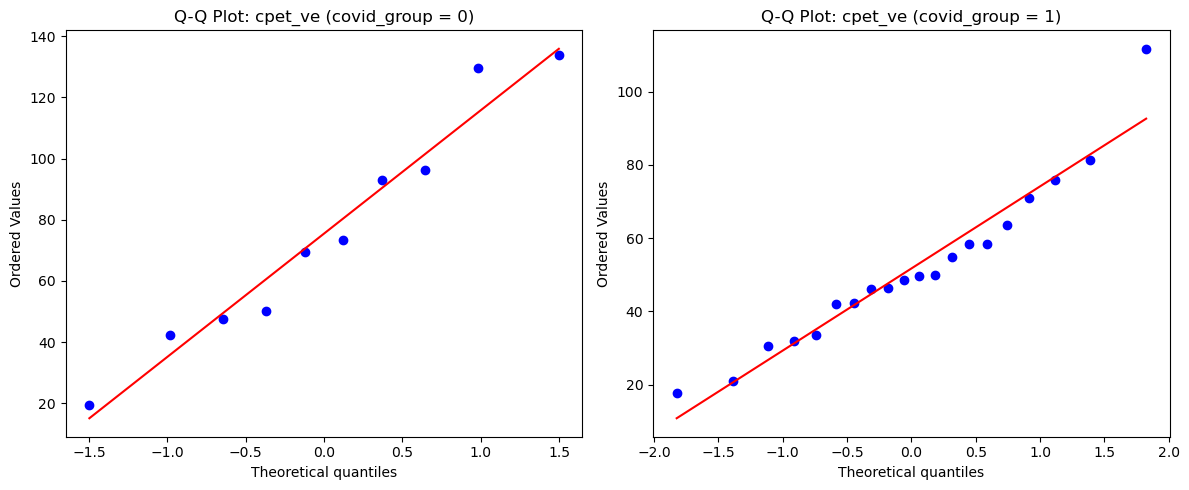

In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats

variable = 'cpet_ve'
group0 = df[df['covid_group'] == 0][variable].dropna()
group1 = df[df['covid_group'] == 1][variable].dropna()

lev = levene(group0, group1)
print(lev)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(group0, dist="norm", plot=plt)
plt.title("Q-Q Plot: cpet_ve (covid_group = 0)")

plt.subplot(1, 2, 2)
stats.probplot(group1, dist="norm", plot=plt)
plt.title("Q-Q Plot: cpet_ve (covid_group = 1)")

plt.tight_layout()
plt.show()

In [7]:
# Print mean cpet_athreshold_vslope_rel for each covid_group
print(df.groupby('covid_group')['cpet_athreshold_vslope_abs'].mean())

covid_group
0.0    1.681667
1.0    1.009733
Name: cpet_athreshold_vslope_abs, dtype: float64


# End